In [88]:
import pandas as pd 
df = pd.read_csv('https://data.wa.gov/api/views/cvrw-ujje/rows.csv?accessType=DOWNLOAD')

In [89]:
import matplotlib.pyplot as plt 
import seaborn as sea 
from scipy import stats
import math


In [102]:
df['Age'] = 2020 - df['BirthYear']

TypeError: cannot convert the series to <class 'float'>

print(df.Race.unique())
print(df.Ethnicity.unique())

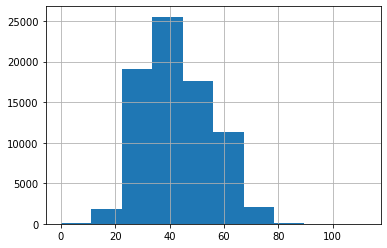

In [92]:
df.Age.hist()
plt.show()

In [93]:
def race_finder (race, data):
    colName = 'Is' + race
    data[colName] = 0
    for i in range(len(df)):
        if race == 'NA' and type(data['Race'][i]) is float:
            df[colName][i] = 1
        elif str(data['Race'][i]).find(race) != -1:
            data[colName][i] = 1
        else:
            data[colName][i] = 0 
    return data  

df = race_finder('White', df)
df = race_finder('Black', df)
df = race_finder('Asian', df)
df = race_finder('Indian', df)
df = race_finder('Pacific', df)
df = race_finder('NA', df)


In [94]:
df['IsHispanic'] = 0
count = 0
for i in range(len(df)):
    entry = df['Ethnicity'][i]
    if type(entry) is float:
        df['IsHispanic'][i] = 0
    elif entry != 'No':
        df['IsHispanic'][i] = 1
        count = count + 1
    else:
        df['IsHispanic'][i] = 0


In [95]:
demos = ['White', 'Black', 'Asian', 'Native Indian', 'Pacific Islander', 'Hispanic', 'N/A']

In [96]:
white = df[df['IsWhite'] == 1]
nonWhite = df[df['IsWhite'] == 0]
black = df[df['IsBlack'] == 1]
nonBlack = df[df['IsBlack'] == 0]
asian = df[df['IsAsian'] == 1]
nonAsian = df[df['IsAsian'] == 1]
americanIndian = df[df['IsIndian'] == 1]
notIndian = df[df['IsIndian'] == 0]
pacificIslander = df[df['IsPacific'] == 1]
notPacificIslander = df[df['IsPacific'] == 0]
hispanic = df[df['IsHispanic'] == 1]
notHispanic = df[df['IsHispanic'] == 0]
noRace = df[df['IsNA'] == 1]
hasRace = df[df['IsNA'] == 0]

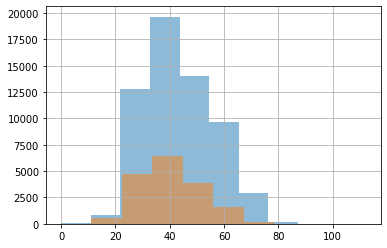

-0.5683961352088578

In [97]:
white['Age'].hist(alpha=0.5)
nonWhite['Age'].hist(alpha=0.5)
plt.show()
white['Age'].skew()
white['Age'].kurtosis()

In [99]:
def A_B_test (a_set, b_set):
    a_skew = a_set.skew()
    a_kurtosis = a_set.kurtosis()
    a_size = len(a_set)
    a_var = a_set.var()
    a_mean = a_set.mean()
    b_skew = b_set.skew()
    b_kurtosis = b_set.kurtosis()
    b_size = len(b_set)
    b_var = b_set.var()
    b_mean = b_set.mean()
    print('The Sample Size of the A group is:', a_size)
    print('The Mean of the A group is:', a_mean)
    print('The Variance of the A group is:', a_var)
    print('The Skew of the A group is:', a_skew)
    print('The Kurtosis of the A group is:', a_kurtosis)
    print('\n')
    print('The Sample Size of the B group is:', b_size)
    print('The Mean of the B group is:', b_mean)
    print('The Variance of the B group is:', b_var)
    print('The Skew of the B group is:', b_skew)
    print('The Kurtosis of the B group is:', b_kurtosis)
A_B_test(white['Age'], nonWhite['Age'])

The Sample Size of the A group is: 60842
The Mean of the A group is: 43.177657717562965
The Variance of the A group is: 160.23187771340898
The Skew of the A group is: 0.37688728167082713
The Kurtosis of the A group is: -0.5683961352088578


The Sample Size of the B group is: 19260
The Mean of the B group is: 40.28419723322427
The Variance of the B group is: 123.75269457510372
The Skew of the B group is: 0.497063652973338
The Kurtosis of the B group is: -0.001897949006564481


In [101]:
stats.ttest_ind(white['Age'], nonWhite['Age'], nan_policy='omit')

Ttest_indResult(statistic=27.27389521528515, pvalue=5.1157802560667e-163)